In [1]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Define functions as in Coursera Course (Springleaf EDA)

In [2]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~train[c1].isnull()) & (~train[c2].isnull())
            if i>=j:
                b.append((train.loc[mask,c1].values>=train.loc[mask,c2].values).mean())
            else:
                b.append((train.loc[mask,c1].values>train.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [3]:
def hist_it1(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    feat[Y==1].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

In [4]:
work_dir = 'E:/temp_DataScience/'

## Read the Data
Notice that pd.read_csv could read .csv.zip directly

In [5]:
train = pd.read_csv(work_dir + 'application_train.csv.zip')
Y = train.TARGET

In [6]:
test = pd.read_csv(work_dir + 'application_test.csv.zip')
test_ID = test.SK_ID_CURR

## Data overview

In [7]:
print('Train shape',train.shape)
print('Test shape',test.shape)

Train shape (307511, 122)
Test shape (48744, 121)


In [8]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Looks like there is no duplication between SK_ID_CURR between train and test, seems like they are created by selecting rows from a large overall table.

*Note from Coursera Course: 'We also see ID column is shared between train and test, which sometimes can be succesfully used to improve the score.'*

## Check for NaNs

*Note from Coursera Course:*
 - You should pay attention to columns with NaNs, and
 - the number of NaNs for each row can serve as a nice feature later.

In [10]:
# Number of NaNs for each object
train.isnull().sum(axis=1).head(15)

0      1
1      2
2     48
3     56
4     50
5     49
6     47
7     48
8     49
9     56
10    48
11    49
12    20
13     1
14     8
dtype: int64

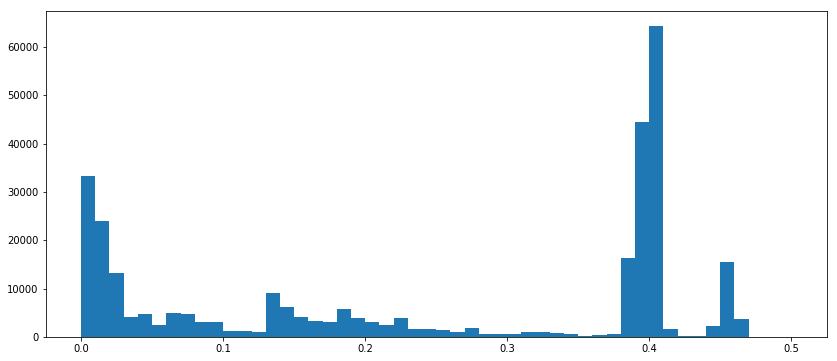

In [23]:
plt.figure(figsize=(14,6))
_ = plt.hist(train.isnull().sum(axis=1).astype(float)/train.shape[1], bins=50)

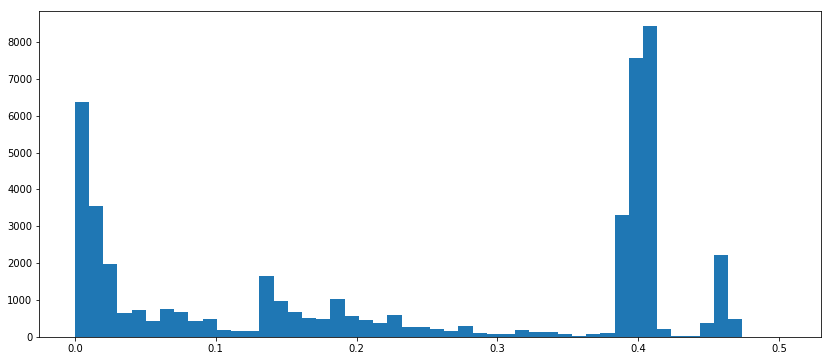

In [28]:
plt.figure(figsize=(14,6))
_ = plt.hist(test.isnull().sum(axis=1).astype(float)/test.shape[1], bins=50)

In [14]:
# Number of NaNs for each column
NaN_count = train.isnull().sum(axis=0)
NaN_count

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

Doesn't seem like there is a strong pattern for missingness for Column, however, it seems that quite a few observations have around 47-50 variables missing. Wondering if those are consistently the same variables.

### Wish List:
 1. Quantify the Missing Pattern (possibly use PROC MI in SAS, or if could do a Frequency listing of the Number of NaNs per row)
 
 Let's check for the top 25 most-missed variables

In [16]:
NaN_count.sort_values()[-25:]/train.shape[0]

NONLIVINGAREA_MEDI          0.551792
EXT_SOURCE_1                0.563811
BASEMENTAREA_MODE           0.585160
BASEMENTAREA_AVG            0.585160
BASEMENTAREA_MEDI           0.585160
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
OWN_CAR_AGE                 0.659908
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MEDI            0.664978
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FONDKAPREMONT_MODE          0.683862
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
COMMONAREA_MODE             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MEDI             0.698723
dtype: float64

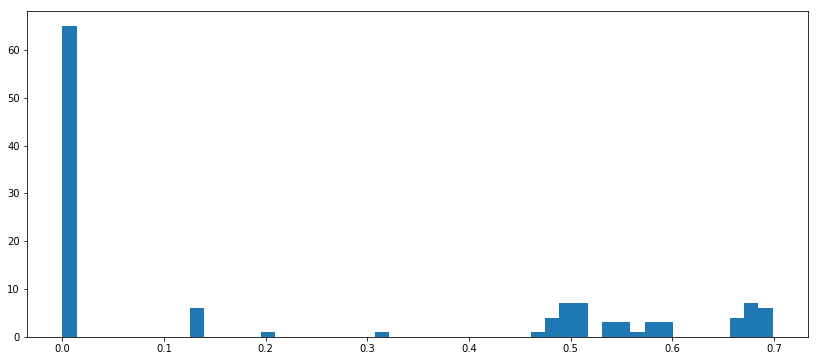

In [21]:
plt.figure(figsize=(14,6))
_ = plt.hist(NaN_count.astype(float)/train.shape[0], bins=50)

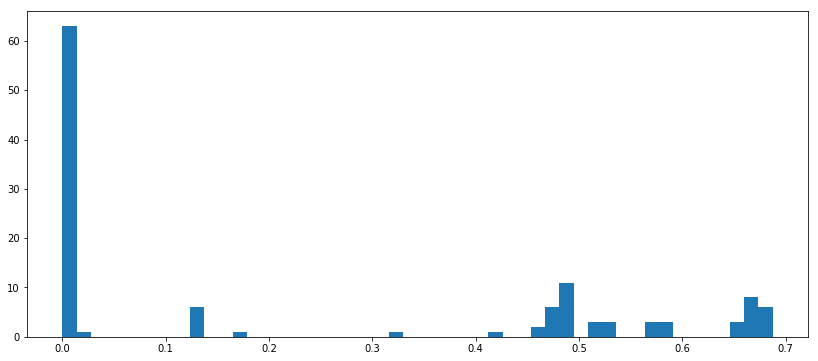

In [29]:
plt.figure(figsize=(14,6))
_ = plt.hist(test.isnull().sum(axis=0).astype(float)/test.shape[0], bins=50)

In [42]:
mask = (train.isnull().sum(axis=0).astype(float)/train.shape[0] > 0.4)
print('Number of predictors that at least 40% of the observations has missing values:', train.loc[:, mask].shape[1])
NaN_count.sort_values()[-49:]/train.shape[0]

Number of predictors that at least 40% of the observations has missing values: 49


EMERGENCYSTATE_MODE             0.473983
TOTALAREA_MODE                  0.482685
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
FLOORSMAX_AVG                   0.497608
FLOORSMAX_MEDI                  0.497608
FLOORSMAX_MODE                  0.497608
HOUSETYPE_MODE                  0.501761
LIVINGAREA_AVG                  0.501933
LIVINGAREA_MODE                 0.501933
LIVINGAREA_MEDI                 0.501933
ENTRANCES_AVG                   0.503488
ENTRANCES_MODE                  0.503488
ENTRANCES_MEDI                  0.503488
APARTMENTS_MEDI                 0.507497
APARTMENTS_AVG                  0.507497
APARTMENTS_MODE                 0.507497
WALLSMATERIAL_MODE              0.508408
ELEVATORS_MEDI                  0.532960
ELEVATORS_AVG                   0.532960
ELEVATORS_MODE                  0.532960
NONLIVINGAREA_MODE              0.551792
NONLIVINGAREA_AVG               0.551792
NONLIVINGAREA_ME

## Dataset cleaning

### Remove constant features

It is usually convenient to concatenate train and test into one dataframe and do all feature engineering using it.

In [54]:
traintest = pd.concat([train, test], axis = 0)

First we schould look for a constant features, such features do not provide any information and only make our dataset larger. 

In [13]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = train.nunique(dropna = False)
feats_counts.sort_values()[:10]

LIVE_CITY_NOT_WORK_CITY    2
FLAG_DOCUMENT_18           2
FLAG_DOCUMENT_14           2
FLAG_MOBIL                 2
FLAG_EMP_PHONE             2
FLAG_WORK_PHONE            2
FLAG_CONT_MOBILE           2
FLAG_DOCUMENT_19           2
FLAG_PHONE                 2
FLAG_DOCUMENT_15           2
dtype: int64

Good news! There is no variables with constant values in the Train dataset, no need to do such kind of removal.

In [14]:
constant_features = feats_counts.loc[feats_counts==1].index.tolist()
print (constant_features)

traintest.drop(constant_features,axis = 1,inplace=True)

[]


### Check for Constant Features in Test
may help us understand how the Test set is generated

In [15]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = test.nunique(dropna = False)
feats_counts.sort_values()[:15]

FLAG_DOCUMENT_2     1
FLAG_DOCUMENT_19    1
FLAG_DOCUMENT_20    1
FLAG_DOCUMENT_21    1
FLAG_DOCUMENT_17    1
FLAG_DOCUMENT_16    1
FLAG_DOCUMENT_14    1
FLAG_DOCUMENT_13    1
FLAG_DOCUMENT_12    1
FLAG_DOCUMENT_15    1
FLAG_DOCUMENT_10    1
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_7     2
dtype: int64

### Remove duplicated features

Fill NaNs with something we can find later if needed.

In [16]:
traintest.fillna('NaN', inplace=True)

Now let's (label) encode each feature, as we discussed. 

In [17]:
train_enc =  pd.DataFrame(index = train.index)

for col in tqdm_notebook(traintest.columns):
    train_enc[col] = train[col].factorize()[0]

A Jupyter Widget

Use a simple loop to check if there are two columns that have exactly the same label encoding (hence exactly the same)

In [18]:
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1

A Jupyter Widget

In [19]:
dup_cols

{}

There are no two columns that are exactly the same. If there were any that are the same, we should save them to save time.

In [22]:
import pickle
pickle.dump(dup_cols, open('dup_cols.p', 'w'), protocol=pickle.HIGHEST_PROTOCOL)

TypeError: write() argument must be str, not bytes

Drop the duplicated columns from traintest

In [31]:
traintest.drop(dup_cols.keys(), axis = 1,inplace=True)

## Determine types

Let's examine the number of unique values.

In [7]:
nunique = train.nunique(dropna=False)
nunique

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13673
AMT_GOODS_PRICE                 1003
NAME_TYPE_SUITE                    8
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
OWN_CAR_AGE                       63
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
F

and build a histogram of those values

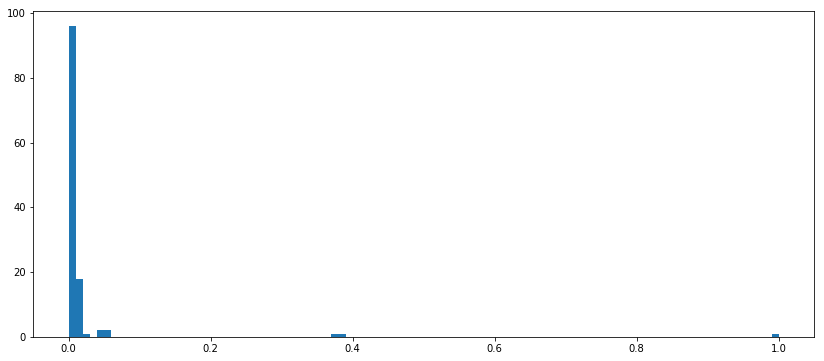

In [35]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/train.shape[0], bins=100)

Let's take a looks at the features with a huge number of unique values:
#### Main point here is to look for float vs count

In [36]:
mask = (nunique.astype(float)/train.shape[0] > 0.8)
train.loc[:, mask]

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007
5,100008
6,100009
7,100010
8,100011
9,100012


Looks like only the Loan ID has high number of unique values.
Let's look at another pack of features. (as seen from the histogram above)

In [37]:
mask = (nunique.astype(float)/train.shape[0] < 0.6) & (nunique.astype(float)/train.shape[0] > 0.2)
train.loc[:25, mask]

,EXT_SOURCE_1,EXT_SOURCE_2
0,0.083037,0.262949
1,0.311267,0.622246
2,NaN,0.555912
3,NaN,0.650442
4,NaN,0.322738
5,NaN,0.354225
6,0.774761,0.724000
7,NaN,0.714279
8,0.587334,0.205747
9,NaN,0.746644


Those are the normalized credit scores.
One observation, EXT_SOURCE_1 seems to have a lot more NaNs than EXT_SOURCE_2
Also, EXT_SOURCE_3 is not on the list of most number of unique values? Let's look at how many unique values it does have.

### Deep Dive into the EXT_SOURCE_1, 2, 3

In [9]:
print('Number of Unique Values for')
print('EXT_SOURCE_1:', nunique.EXT_SOURCE_1, 'EXT_SOURCE_2:', nunique.EXT_SOURCE_2, 'EXT_SOURCE_3:', nunique.EXT_SOURCE_3)

Number of Unique Values for
EXT_SOURCE_1: 114585 EXT_SOURCE_2: 119832 EXT_SOURCE_3: 815


That is interesting -- EXT_SOURCE_3 has way fewer unique values than 1 or 2. What about missing values?

In [11]:
print('Number of Missing Values for')
print('EXT_SOURCE_1:', NaN_count.EXT_SOURCE_1, 'EXT_SOURCE_2:', NaN_count.EXT_SOURCE_2, 'EXT_SOURCE_3:', NaN_count.EXT_SOURCE_3)
print('Proportion of observations that has  Missing Values for')
print('EXT_SOURCE_1:', NaN_count.EXT_SOURCE_1/train.shape[0], 'EXT_SOURCE_2:', NaN_count.EXT_SOURCE_2/train.shape[0], 
      'EXT_SOURCE_3:', NaN_count.EXT_SOURCE_3/train.shape[0])

Number of Missing Values for
EXT_SOURCE_1: 173378 EXT_SOURCE_2: 660 EXT_SOURCE_3: 60965
Proportion of observations that has  Missing Values for
EXT_SOURCE_1: 0.56381072547 EXT_SOURCE_2: 0.00214626468647 EXT_SOURCE_3: 0.198253070622


EXT_SOURCE_2 seems to be the most reliable. 
EXT_SOURCE_3 is missing 20% of the time, and has very few unique values.
EXT_SOURCE_1 is missing 56% of the time, though it has a lot more unique values than EXT_SOURCE_3.
Actually looking at the order of magnitude of the Normalized Score, Score 3 is most like FICO score. Wondering if we could find out when it would be missing. Will try that in R.

Now let's check the Scatter Plot for these Scores in Train vs Test

In [59]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

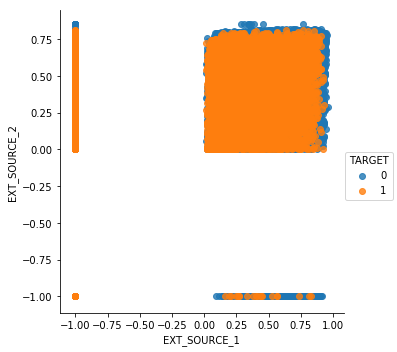

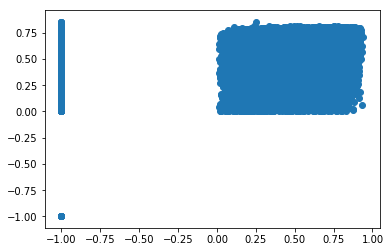

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.lmplot('EXT_SOURCE_1','EXT_SOURCE_2', data=train, hue='TARGET', fit_reg=False)
plt.show()

plt.scatter(test.EXT_SOURCE_1,test.EXT_SOURCE_2)
plt.show()

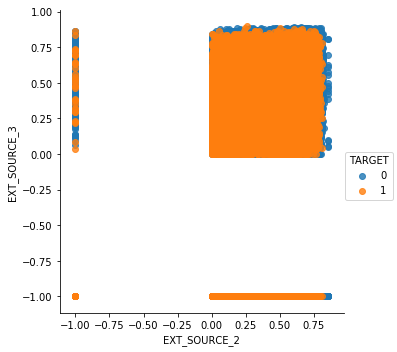

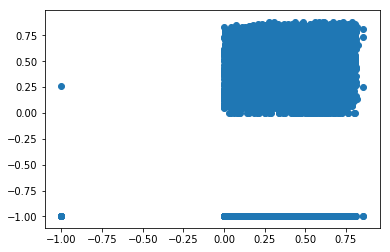

In [63]:
sns.lmplot('EXT_SOURCE_2','EXT_SOURCE_3', data=train, hue='TARGET', fit_reg=False)
plt.show()

plt.scatter(test.EXT_SOURCE_2,test.EXT_SOURCE_3)
plt.show()

Create a list of Categorical Columns and Numeric Columns

In [47]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
num_cols = list(train.select_dtypes(exclude=['object']).columns)
print('Categorical features: ', len(cat_cols), '; Numeric features: ', len(num_cols))

Categorical features:  16 ; Numeric features:  106
